**1. Linear regression and Regularization:**

 ***(a) Predict the “Overall” (target attribute: “overall”) rating of the players using Linear
regression report the Mean Absolute Error(MAE), Mean Square Error(MSE), R2 score.***

 ***(b) Compare the performance of linear regression, Ridge regression, and Lasso regression
models. Perform the hyperparameters tuning and observe how they affect the model’s
bias-variance trade-off, investigate the impact of the Lasso regularisation parameter on
this feature selection process.***

 ***Note: Please carry out the necessary data preprocessing and test-train split as 20 : 80%.
The use of the scikit-learn library is allowed for this question. For (b), include necessary
metrics like MSE, MAE, R2 Score for performance analysis and necessary plots (Ex:
Scatter plots/line plots) for hyperparameters tuning.***

In [ ]:
import csv
def load_data(filename):
    dataset = []
    csvfile = open(filename, newline = '')
    reader = csv.reader(csvfile)
    for i in reader:
        dataset.append(i)
    return dataset

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.evaluate import bias_variance_decomp

path_link = "/content/drive/MyDrive/ML_assignment/football.csv"
dataframe = pd.read_csv(path_link)
dataframe.head()

,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
0,158023,L. Messi,93,93,78000000.0,320000.0,34,170,72,73.0,...,20,35,24,6,11,15,14,8,NaN,1
1,188545,R. Lewandowski,92,92,119500000.0,270000.0,32,185,81,21.0,...,35,42,19,15,6,12,8,10,NaN,1
2,20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,187,83,11.0,...,24,32,24,7,11,15,14,11,NaN,1
3,190871,Neymar Jr,91,91,129000000.0,270000.0,29,175,68,73.0,...,35,32,29,9,9,15,15,11,NaN,1
4,192985,K. De Bruyne,91,91,125500000.0,350000.0,30,181,70,10.0,...,68,65,53,15,13,5,10,13,NaN,1


In [ ]:
dataframe = dataframe.drop(['club_team_id','club_name','league_name','club_jersey_number','nation_jersey_number','preferred_foot','work_rate','body_type','player_tags','player_traits','sofifa_id','short_name'],axis=1)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      7772 non-null   int64  
 1   potential                    7772 non-null   int64  
 2   value_eur                    7706 non-null   float64
 3   wage_eur                     7711 non-null   float64
 4   age                          7772 non-null   int64  
 5   height_cm                    7772 non-null   int64  
 6   weight_kg                    7772 non-null   int64  
 7   league_level                 7711 non-null   float64
 8   weak_foot                    7772 non-null   int64  
 9   skill_moves                  7772 non-null   int64  
 10  international_reputation     7772 non-null   int64  
 11  release_clause_eur           7306 non-null   float64
 12  pace                         7063 non-null   float64
 13  shooting          

In [ ]:
median_value = dataframe['value_eur'].median()
dataframe['value_eur'].fillna(value=median_value,inplace=True)

median_value = dataframe['wage_eur'].median()
dataframe['wage_eur'].fillna(value=median_value,inplace=True)

median_value = dataframe['league_level'].median()
dataframe['league_level'].fillna(value=median_value,inplace=True)

median_value = dataframe['release_clause_eur'].median()
dataframe['release_clause_eur'].fillna(value=median_value,inplace=True)

median_value = dataframe['pace'].median()
dataframe['pace'].fillna(value=median_value,inplace=True)

median_value = dataframe['shooting'].median()
dataframe['shooting'].fillna(value=median_value,inplace=True)

median_value = dataframe['passing'].median()
dataframe['passing'].fillna(value=median_value,inplace=True)

median_value = dataframe['dribbling'].median()
dataframe['dribbling'].fillna(value=median_value,inplace=True)

median_value = dataframe['defending'].median()
dataframe['defending'].fillna(value=median_value,inplace=True)

median_value = dataframe['physic'].median()
dataframe['physic'].fillna(value=median_value,inplace=True)

median_value = dataframe['goalkeeping_speed'].median()
dataframe['goalkeeping_speed'].fillna(value=median_value,inplace=True)


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      7772 non-null   int64  
 1   potential                    7772 non-null   int64  
 2   value_eur                    7772 non-null   float64
 3   wage_eur                     7772 non-null   float64
 4   age                          7772 non-null   int64  
 5   height_cm                    7772 non-null   int64  
 6   weight_kg                    7772 non-null   int64  
 7   league_level                 7772 non-null   float64
 8   weak_foot                    7772 non-null   int64  
 9   skill_moves                  7772 non-null   int64  
 10  international_reputation     7772 non-null   int64  
 11  release_clause_eur           7772 non-null   float64
 12  pace                         7772 non-null   float64
 13  shooting          

In [ ]:
#features
X= dataframe.drop(columns=['overall'])
#target variables
Y= dataframe['overall']

In [ ]:
dataframe.head()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
0,93,93,78000000.0,320000.0,34,170,72,1.0,4,4,...,20,35,24,6,11,15,14,8,42.0,1
1,92,92,119500000.0,270000.0,32,185,81,1.0,4,4,...,35,42,19,15,6,12,8,10,42.0,1
2,91,91,45000000.0,270000.0,36,187,83,1.0,4,5,...,24,32,24,7,11,15,14,11,42.0,1
3,91,91,129000000.0,270000.0,29,175,68,1.0,5,5,...,35,32,29,9,9,15,15,11,42.0,1
4,91,91,125500000.0,350000.0,30,181,70,1.0,5,4,...,68,65,53,15,13,5,10,13,42.0,1


# ***Train and Test split***

---
The train_test_split() method is used to split our data into train and test sets. First, we need to divide our data into features (X) and labels (Y). The dataframe gets divided into X_train, X_test, Y_train, and Y_test.
With random_state=42, we get the same train and test sets across different executions.

In [ ]:
##train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

pandas.core.frame.DataFrame

In [ ]:
X_train


array([[-1.00477957, -0.33102792, -0.36930608, ..., -0.17142759,
         0.05553359,  1.09434744],
       [ 0.65024231, -0.15260456, -0.28564195, ..., -0.28288018,
         0.05553359,  1.09434744],
       [-0.67377519, -0.29727215, -0.32747401, ..., -0.56151164,
         0.05553359,  1.09434744],
       ...,
       [ 0.65024231,  0.21388665,  0.30000696, ..., -0.33860647,
         0.05553359, -0.91378657],
       [-1.9977927 , -0.39661055, -0.45297021, ...,  2.33625556,
        -0.56486588, -0.91378657],
       [-0.17726863, -0.34308355, -0.46970303, ..., -0.45005905,
         0.05553359,  1.09434744]])

In [ ]:
X_test

array([[ 0.48474012, -0.27798313, -0.32747401, ..., -0.33860647,
         0.05553359, -0.91378657],
       [ 0.98124669, -0.07544852, -0.24380988, ..., -0.61723793,
         0.05553359, -0.91378657],
       [-0.50827301, -0.3840727 , -0.47388624, ..., -0.05997501,
         0.05553359, -0.91378657],
       ...,
       [ 0.48474012,  0.01135203,  1.13664825, ..., -0.56151164,
         0.05553359, -0.91378657],
       [ 1.14674888, -0.33343904, -0.46342822, ..., -0.45005905,
         0.05553359,  1.09434744],
       [-1.17028176, -0.35272805, -0.36930608, ..., -0.22715388,
         0.05553359, -0.91378657]])

In [ ]:
Y_train

5844    65
2570    71
3939    68
6761    63
3774    69
        ..
5226    66
5390    66
860     76
7603    58
7270    61
Name: overall, Length: 6217, dtype: int64

## ***Standardizing the dataset***
The idea behind StandardScaler() is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

In [ ]:
##standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


***fit_transform()*** is used on the training data to learn the scaling or transformation parameters and then applies the same transformation to the training data.

In [ ]:
X_train = pd.DataFrame(scaler.fit_transform(X_train))


***transform()*** is used on new data (e.g. test data) to apply the same transformation that was learned on the training data.

In [ ]:
X_test = pd.DataFrame(scaler.transform(X_test))

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-1.004780,-0.331028,-0.369306,-0.408557,-0.214163,0.209685,-0.470269,-1.448765,0.698947,-0.312287,...,0.042578,0.232514,0.113667,-0.626263,-0.099468,-0.280921,-0.570713,-0.171428,0.055534,1.094347
1,0.650242,-0.152605,-0.285642,-0.408557,-0.799224,-0.498185,0.843737,0.000000,1.972124,-0.312287,...,0.347071,0.375439,0.452017,-0.398040,-0.158815,-0.220006,0.008223,-0.282880,0.055534,1.094347
2,-0.673775,-0.297272,-0.327474,0.286825,-0.945489,-0.073463,-0.470269,1.448765,0.698947,-0.312287,...,0.702313,0.280156,0.307010,-0.226873,-0.574242,-0.037262,-0.049671,-0.561512,0.055534,1.094347
3,-0.839277,-0.345495,-0.452970,-0.640351,-0.799224,-2.197073,-0.470269,0.000000,0.698947,-0.312287,...,-1.429140,-1.339658,-1.191398,-0.340985,-0.574242,-0.402751,-0.165458,-0.338606,0.055534,1.094347
4,0.650242,-0.142960,-0.201978,-0.872145,-0.506693,-1.489203,0.843737,0.000000,-0.574230,-0.312287,...,-0.566409,-0.910884,-0.321355,-0.226873,-0.336855,-0.037262,-0.397032,-0.394333,0.055534,1.094347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,-0.177269,-0.287628,-0.285642,-0.872145,-0.945489,-1.064481,-0.470269,0.000000,0.698947,-0.312287,...,-1.429140,-0.625034,-0.901384,-0.512152,-0.396202,-0.098177,-0.339139,-0.338606,0.055534,1.094347
6213,0.650242,-0.239405,-0.411138,-1.103939,-0.652959,-1.347629,0.843737,0.000000,-0.574230,-0.312287,...,0.397820,0.518364,0.693696,-0.512152,-0.158815,-0.220006,-0.281245,-0.394333,0.055534,-0.913787
6214,0.650242,0.213887,0.300007,0.518619,-0.214163,-0.781333,-0.470269,2.897530,0.698947,-0.312287,...,0.803811,0.756572,0.887039,-0.055707,-0.277509,-0.098177,-0.339139,-0.338606,0.055534,-0.913787
6215,-1.997793,-0.396611,-0.452970,0.286825,-0.214163,0.209685,-0.470269,-2.897530,-1.847407,-0.312287,...,-2.291871,-1.816074,-1.819763,2.397686,2.393097,2.703902,2.497647,2.336256,-0.564866,-0.913787


### ***1a.***

### ***Linear Regression***

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
#Train the Linear Regression model
regressions=LinearRegression() #creates an instance of the Linear Regression model
regressions.fit(X_train,Y_train) # fits the linear regression model using the training data

LinearRegression()

In [ ]:
##predictions on test data(X_test)
reg_pred=regressions.predict(X_test) #reg_pred represents the predicted values from the regression model.

In [ ]:
reg_pred

array([72.39291603, 70.16215649, 73.51378143, ..., 73.46258729,
       65.26498322, 63.3770393 ])

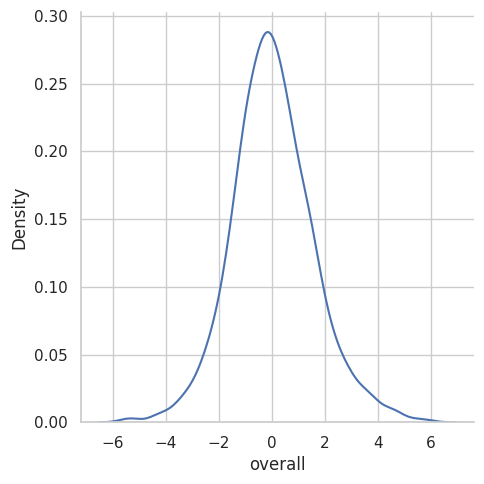

In [ ]:
import seaborn as sns
sns.displot(reg_pred-Y_test,kind='kde')

We can see from the above the graph that the variance is small.We can see except outliers, other data points have the diffrence between -6 to 6.

# ***Reporting the Mean Absolute Error(MAE), Mean Square Error(MSE), R2 score***

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(Y_test.to_numpy(), reg_pred)
mse = mean_squared_error(Y_test.to_numpy(), reg_pred)
score = r2_score(Y_test.to_numpy(),reg_pred)
error,bias,var = bias_variance_decomp(regressions, X_train.values, Y_train.values, X_test.values, Y_test.values, loss='mse', random_seed=123)

In [ ]:
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", score)
print('MSE from bias_variance lib [avg expected loss]: %.3f' % error)
print('Avg Bias: %.3f' % bias)
print('Avg Variance: %.3f' % var)

MAE: 1.1729818298412125
MSE: 2.35264459385878
R2 Score: 0.9374217179957465
MSE from bias_variance lib [avg expected loss]: 2.374
Avg Bias: 2.352
Avg Variance: 0.022


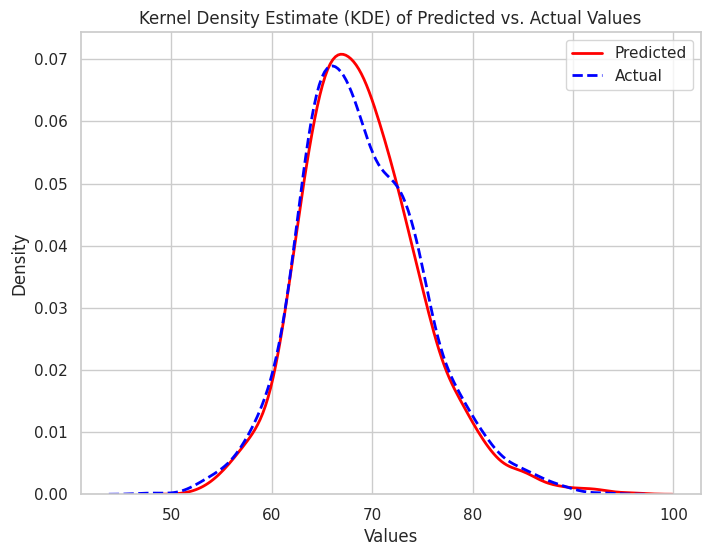

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a KDE plot of the residuals
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot the predicted values (red line)
sns.kdeplot(reg_pred, color='red', label='Predicted', linestyle='-', linewidth=2)

# Plot the actual values (dotted line)
sns.kdeplot(Y_test, color='blue', label='Actual', linestyle='--', linewidth=2)

plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Kernel Density Estimate (KDE) of Predicted vs. Actual Values")
plt.legend()
plt.show()


### ***1b***

## ***Ridge Regression***

In [ ]:
from sklearn.linear_model import Ridge

from sklearn import metrics

In [ ]:
parameters=[0.05,0.1,0.2,0.5,1,2,5,10,20,30,40,50,60,70,80]

In [ ]:
r_mae_list = []
r_mse_list = []
r_r2_list = []

for a in parameters:
    ridge_model = Ridge(alpha=a)
    ridge_model.fit(X_train,Y_train)
    ridge_pred = ridge_model.predict(X_test)

    ridge_mae = mean_absolute_error(Y_test, ridge_pred)
    ridge_mse = mean_squared_error(Y_test, ridge_pred)
    ridge_r2 = r2_score(Y_test, ridge_pred)

    r_mae_list.append(ridge_mae)
    r_mse_list.append(ridge_mse)
    r_r2_list.append(ridge_r2)




# ***Plot hyperparameter tuning results for Ridge Regression***

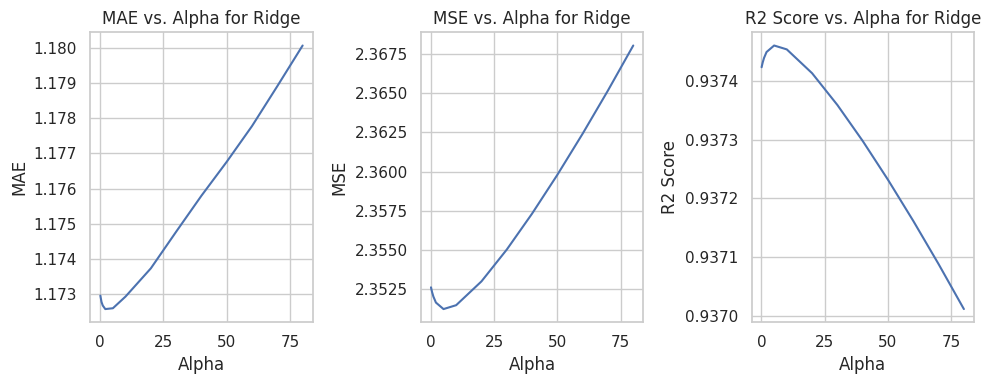

In [ ]:
# Plot hyperparameter tuning results for Ridge Regression
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.plot(parameters, r_mae_list)
plt.title("MAE vs. Alpha for Ridge")
plt.xlabel("Alpha")
plt.ylabel("MAE")

plt.subplot(1, 3, 2)
plt.plot(parameters, r_mse_list)
plt.title("MSE vs. Alpha for Ridge")
plt.xlabel("Alpha")
plt.ylabel("MSE")

plt.subplot(1, 3, 3)
plt.plot(parameters,r_r2_list)
plt.title("R2 Score vs. Alpha for Ridge")
plt.xlabel("Alpha")
plt.ylabel("R2 Score")

plt.tight_layout()
plt.show()

# ***Choose the best alpha based on maximum R2 score***



In [ ]:
best_alpha = parameters[r_r2_list.index(max(r_r2_list))]  # Change this based on your selection criteria
print(f"Best Ridge Alpha: {best_alpha}")

Best Ridge Alpha: 5


# ***Train Ridge model with the best alpha and evaluate the best ridge model***

In [ ]:
# Train Ridge model with the best alpha
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, Y_train)
best_ridge_pred = best_ridge_model.predict(X_test)

# Evaluate the best Ridge model
best_ridge_mae = mean_absolute_error(Y_test.to_numpy(), best_ridge_pred)
best_ridge_mse = mean_squared_error(Y_test.to_numpy(), best_ridge_pred)
best_ridge_r2 = r2_score(Y_test.to_numpy(), best_ridge_pred)
error_ridge, bias_ridge, var_ridge = bias_variance_decomp(best_ridge_model, X_train.values, Y_train.values, X_test.values, Y_test.values, loss='mse', random_seed=123)
print("Best Ridge Model Metrics:")
print("MAE:", best_ridge_mae)
print("MSE:", best_ridge_mse)
print("R2 Score:", best_ridge_r2)
print('MSE from bias_variance lib [avg expected loss]: %.3f' % error_ridge)
print('Avg Bias: %.3f' % bias_ridge)
print('Avg Variance: %.3f' % var_ridge)


Best Ridge Model Metrics:
MAE: 1.17260056240103
MSE: 2.3512168784254546
R2 Score: 0.9374596939736064
MSE from bias_variance lib [avg expected loss]: 2.372
Avg Bias: 2.351
Avg Variance: 0.021


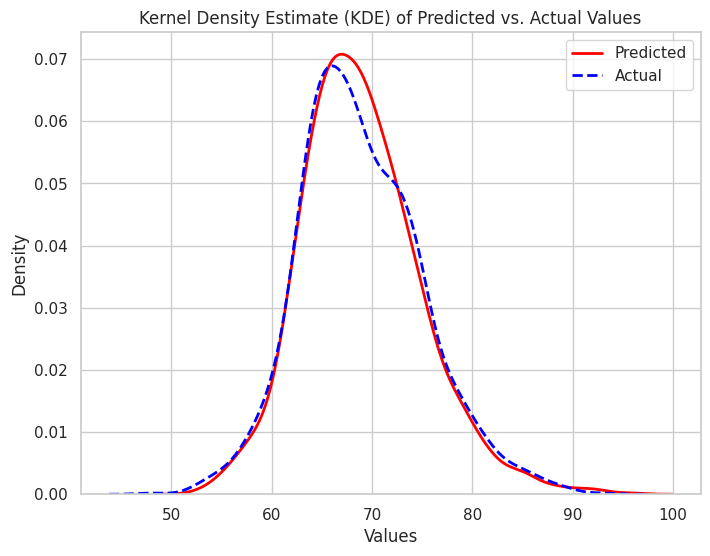

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a KDE plot of the residuals
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot the predicted values (red line)
sns.kdeplot(best_ridge_pred, color='red', label='Predicted', linestyle='-', linewidth=2)

# Plot the actual values (dotted line)
sns.kdeplot(Y_test, color='blue', label='Actual', linestyle='--', linewidth=2)

plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Kernel Density Estimate (KDE) of Predicted vs. Actual Values")
plt.legend()
plt.show()

# ***Lasso Regression***

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
parameters=[0.05,0.1,0.2,0.5,1,2,5,10,20,30,40,50,60,70,80]

In [ ]:
l_mae_list = []
l_mse_list = []
l_r2_list = []
bias_squared = []
variance = []
for a in parameters:
    lasso_model = Lasso(alpha=a)
    lasso_model.fit(X_train,Y_train)
    lasso_pred = lasso_model.predict(X_test)

    lasso_mae = mean_absolute_error(Y_test, lasso_pred)
    lasso_mse = mean_squared_error(Y_test, lasso_pred)
    lasso_r2 = r2_score(Y_test, lasso_pred)
    # Calculate bias and variance
    bias_squared.append(mean_squared_error(Y_test,lasso_pred))
    variance.append(np.var(lasso_pred))

    l_mae_list.append(lasso_mae)
    l_mse_list.append(lasso_mse)
    l_r2_list.append(lasso_r2)

## ***Plot hyperparameter tuning results for Lasso Regression***

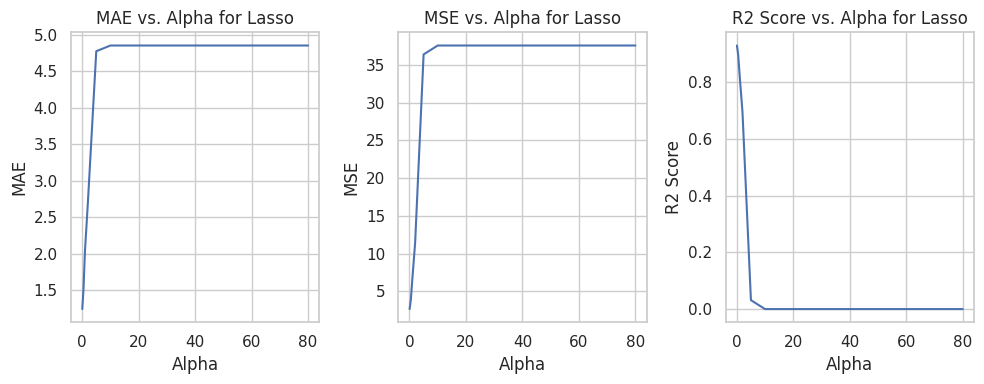

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.plot(parameters, l_mae_list)
plt.title("MAE vs. Alpha for Lasso")
plt.xlabel("Alpha")
plt.ylabel("MAE")

plt.subplot(1, 3, 2)
plt.plot(parameters, l_mse_list)
plt.title("MSE vs. Alpha for Lasso")
plt.xlabel("Alpha")
plt.ylabel("MSE")

plt.subplot(1, 3, 3)
plt.plot(parameters,l_r2_list)
plt.title("R2 Score vs. Alpha for Lasso")
plt.xlabel("Alpha")
plt.ylabel("R2 Score")

plt.tight_layout()
plt.show()

### ***Choose the best alpha based on maximum R2 score***

In [ ]:
best_alpha1 = parameters[l_r2_list.index(max(l_r2_list))]  # Change this based on your selection criteria
print(f"Best Ridge Alpha: {best_alpha1}")

Best Ridge Alpha: 0.05


### ***Train Lasso model with the best alpha and evaluate the best lasso model***

In [ ]:
# Train Lasso model with the best alpha
best_lasso_model = Lasso(alpha=best_alpha1)
best_lasso_model.fit(X_train, Y_train)
best_lasso_pred = best_lasso_model.predict(X_test)

# Evaluate the best Lasso model
best_lasso_mae = mean_absolute_error(Y_test.to_numpy(), best_lasso_pred)
best_lasso_mse = mean_squared_error(Y_test.to_numpy(), best_lasso_pred)
best_lasso_r2 = r2_score(Y_test.to_numpy(), best_lasso_pred)
error_reg_las,bias_reg_las, var_reg_las = bias_variance_decomp(best_lasso_model, X_train.values, Y_train.values, X_test.values, Y_test.values, loss='mse', random_seed=123)

print("Best Ridge Model Metrics:")
print("MAE:", best_lasso_mae)
print("MSE:", best_lasso_mse)
print("R2 Score:", best_lasso_r2)
print('MSE from bias_variance lib [avg expected loss]: %.3f' % error_reg_las)
print('Avg Bias: %.3f' % bias_reg_las)
print('Avg Variance: %.3f' % var_reg_las)

Best Ridge Model Metrics:
MAE: 1.2424116074728517
MSE: 2.6319914239698523
R2 Score: 0.9299913374115663
MSE from bias_variance lib [avg expected loss]: 2.639
Avg Bias: 2.626
Avg Variance: 0.013


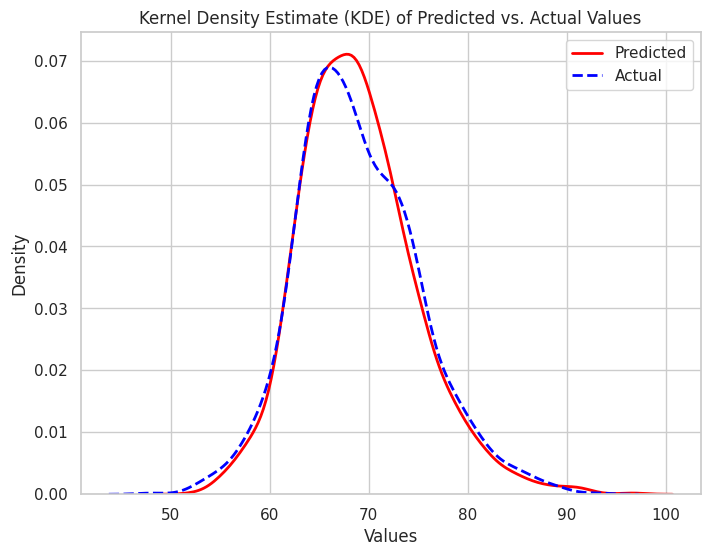

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a KDE plot of the residuals
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot the predicted values (red line)
sns.kdeplot(best_lasso_pred, color='red', label='Predicted', linestyle='-', linewidth=2)

# Plot the actual values (dotted line)
sns.kdeplot(Y_test, color='blue', label='Actual', linestyle='--', linewidth=2)

plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Kernel Density Estimate (KDE) of Predicted vs. Actual Values")
plt.legend()
plt.show()